In [40]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import pandas as pd 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
covidTweets = pd.read_csv("covid19_tweets.csv")

In [41]:
df = pd.read_csv("covid19_tweets1.csv")
df.head()
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


<h1> Objetivo #1 </h1>

<h3> Conocer la relación entre la información y número de tweets por zona geográfica (país) con su situación actual con respecto al COVID-19 </h3>

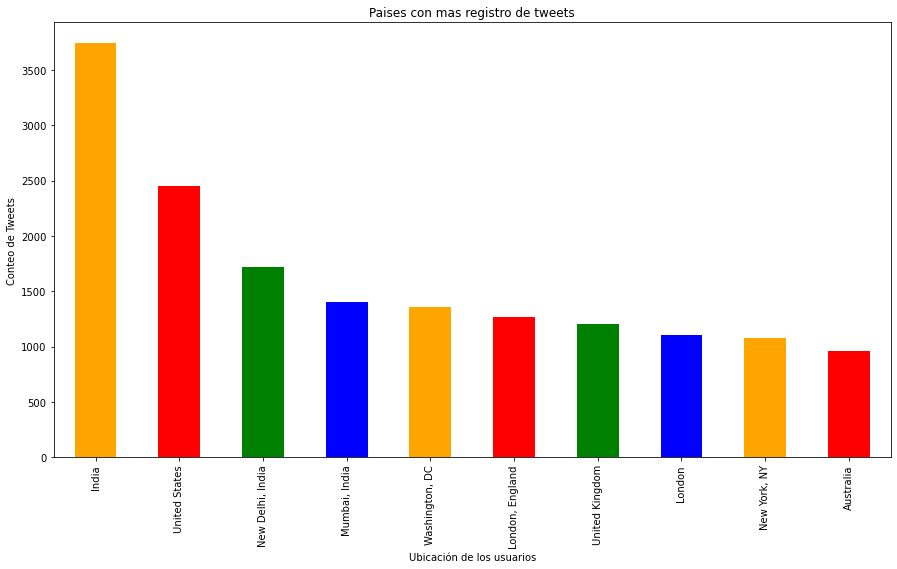

In [42]:
plt.figure(figsize=(15,8))
loca = df['user_location'].value_counts().sort_values(ascending=False)
loc= loca.head(10)
loc.plot.bar(color=['orange', 'red', 'green', 'blue'])
plt.title('Paises con mas registro de tweets')
plt.xlabel('Ubicación de los usuarios')
plt.ylabel('Conteo de Tweets')
plt.show()

In [43]:
def hashtag(x):
  x = str(x)
  x = x.replace('[','')
  x = x.replace(']','')
  x = x.split(',')
  return x
df['hashtag'] = df['hashtags'].apply(lambda y : hashtag(y))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str)
df['hashtag'] = df['hashtag'].str.replace("'",'')
df['hashtag'] = df['hashtag'].str.replace('"','')
df['hashtag'] = df['hashtag'].str.replace(" ",'')
df= df[df['hashtag'] != 'nan']

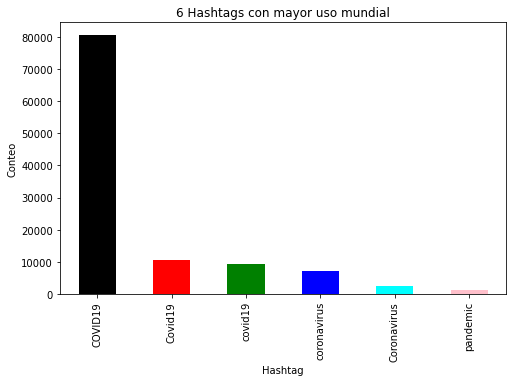

In [54]:
# Hashtags en todo el mundo
plt.figure(figsize=(8,5))
source = df['hashtag'].value_counts().sort_values(ascending=False)
source = souce.head(6)
source.plot.bar(color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.title('6 Hashtags con mayor uso mundial')
plt.xlabel('Hashtag')
plt.ylabel('Conteo')
plt.show()

C:\Users\leona\Anaconda\envs\SemanaTecAnalitica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



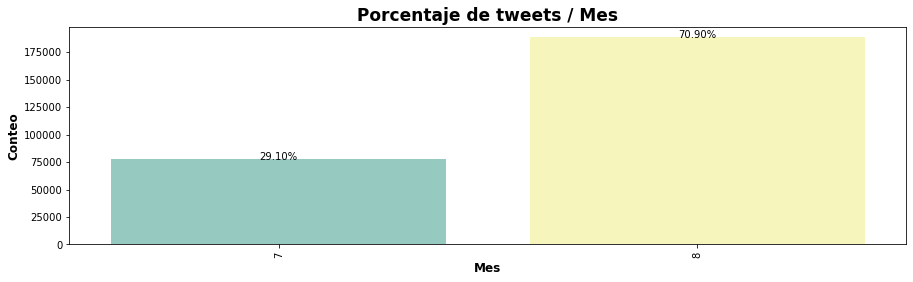

C:\Users\leona\Anaconda\envs\SemanaTecAnalitica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



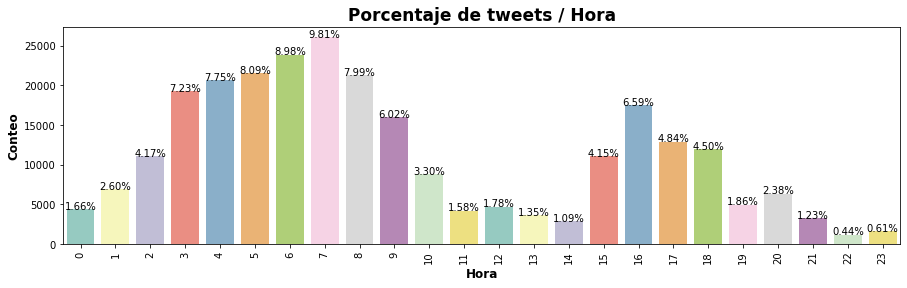

In [52]:
df['datedt'] = pd.to_datetime(df['date'])
df['Mes'] = df['datedt'].dt.month
df['Hora'] = df['datedt'].dt.hour
df['date_only'] = df['datedt'].dt.date

def countplot(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(15,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Porcentaje de {}".format(title),weight='bold', size=17)
    if(size > 2):
        plt.xticks(rotation=90, size=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.xlabel(feature, size=12, weight='bold')
    plt.ylabel('Conteo', size=12, weight='bold')
    plt.show() 

countplot("Mes", "tweets / Mes", df, size=3, ordered=False)
countplot("Hora", "tweets / Hora", df,size=4, ordered=False)

<h1> Objetivo #2 </h1>

<h3>Conocer la relación entre el giro laboral de las cuentas de twitter y el número de publicaciones que hacen con respecto al COVID-19, a través de gráficas que serán programadas a lo largo de la semana con ayuda de los datos recopilados por Kaggle. </h3>

<h1> Objetivo #3</h1>

<h3> Conocer la relación entre las fuentes principales de los tweets con el objetivo de la cuenta. </h3>

Agradecimientos a Notebooks:
Covid_geo_complete_analysis

